<a href="https://colab.research.google.com/github/lovellbrian/ELEC4630/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Deep Learning in Python by Francoise Chollet, p 68

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.
Why use separate training and test sets? Because you should never test a machinelearning
model on the same data that you used to train it! Just because a model performs
well on its training data doesn’t mean it will perform well on data it has never
seen; and what you care about is your model’s performance on new data (because you
already know the labels of your training data—obviously you don’t need your model
to predict those). For instance, it’s possible that your model could end up merely memorizing
a mapping between your training samples and their targets, which would be
useless for the task of predicting targets for data the model has never seen before.
We’ll go over this point in much more detail in the next chapter.
Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.
The following code will load the dataset (when you run it the first time, about
80 MB of data will be downloaded to your machine)

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Examine IMDB data

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Examine corresponding label.  A label of 1 is a positive sentiment.

In [ ]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [ ]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how you can quickly decode one of these reviews back to English
words:

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


Decoded review is as follows

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors. There are two ways to do that:
 Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, word_indices), and then use as the first layer in
your network a layer capable of handling such integer tensors (the Embedding
layer, which we’ll cover in detail later in the book).
 One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.
Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Here’s what the samples look like now:

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels, which is straightforward:

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building your network
The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup
you’ll ever encounter. A type of network that performs well on such a problem is
a simple stack of fully connected (Dense) layers with relu activations: Dense(16,
activation='relu').
The argument being passed to each Dense layer (16) is the number of hidden
units of the layer. A hidden unit is a dimension in the representation space of the layer.
You may remember from chapter 2 that each such Dense layer with a relu activation
implements the following chain of tensor operations:
output = relu(dot(W, input) + b)
Having 16 hidden units means the weight matrix W will have shape (input_dimension,
16): the dot product with W will project the input data onto a 16-dimensional representation
space (and then you’ll add the bias vector b and apply the relu operation). You
can intuitively understand the dimensionality of your representation space as “how
much freedom you’re allowing the network to have when learning internal representations.”
Having more hidden units (a higher-dimensional representation space)
allows your network to learn more-complex representations, but it makes the network
more computationally expensive and may lead to learning unwanted patterns (patterns
that will improve performance on the training data but not on the test data).
There are two key architecture decisions to be made about such a stack of Dense layers:
 How many layers to use
 How many hidden units to choose for each layer
In chapter 4, you’ll learn formal principles to guide you in making these choices. For
the time being, you’ll have to trust me with the following architecture choice:
 Two intermediate layers with 16 hidden units each
 A third layer that will output the scalar prediction regarding the sentiment of
the current review
The intermediate layers will use relu as their activation function, and the final layer
will use a sigmoid activation so as to output a probability (a score between 0 and 1,
And here’s the Keras implementation,
similar to the MNIST example you saw previously.

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Finally, you need to choose a loss function and an optimizer. Because you’re facing a
binary classification problem and the output of your network is a probability (you end
your network with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss. It isn’t the only viable choice: you could use, for instance,
mean_squared_error. But crossentropy is usually the best choice when you’re dealing
with models that output probabilities. Crossentropy is a quantity from the field of Information
Theory that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions.
Here’s the step where you configure the model with the rmsprop optimizer and
the binary_crossentropy loss function. Note that you’ll also monitor accuracy
during training.

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

You’re passing your optimizer, loss function, and metrics as strings, which is possible
because rmsprop, binary_crossentropy, and accuracy are packaged as part of Keras.
Sometimes you may want to configure the parameters of your optimizer or pass a custom
loss function or metric function. The former can be done by passing an optimizer
class instance as the optimizer argument, as shown in listing 3.5; the latter can be
done by passing function objects as the loss and/or metrics arguments, as shown in
listing 3.6.

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [ ]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 15s 52ms/step - loss: 0.5896 - acc: 0.7060 - val_loss: 0.3849 - val_acc: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3181 - acc: 0.9049 - val_loss: 0.3259 - val_acc: 0.8701
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2246 - acc: 0.9281 - val_loss: 0.3059 - val_acc: 0.8759
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1732 - acc: 0.9475 - val_loss: 0.2778 - val_acc: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1408 - acc: 0.9584 - val_loss: 0.2850 - val_acc: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1082 - acc: 0.9692 - val_loss: 0.2911 - val_acc: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0946 - acc: 0.9735 - val_loss: 0.3585 - val_acc: 0.8725
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0731 - 

In [ ]:
>>> history_dict = history.history
>>> history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

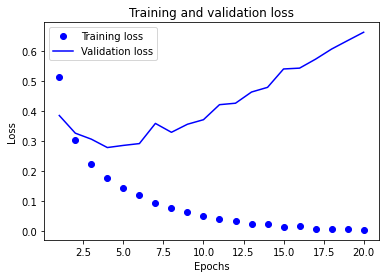

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

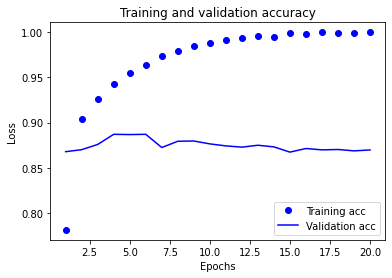

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.5472 - accuracy: 0.7453
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2714 - accuracy: 0.9057
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1938 - accuracy: 0.9348
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8821


In [ ]:
results

[0.2989356219768524, 0.8821200132369995]

In [ ]:
model.predict(x_test)

array([[0.16120598],
       [0.99993825],
       [0.94740903],
       ...,
       [0.11679348],
       [0.07877454],
       [0.75288707]], dtype=float32)